Import libraries

In [29]:
# Import required libraries

import pandas as pd
import os
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import matplotlib.ticker as mticker

%matplotlib inline

In [3]:
# Load the environment variables from the .env file

load_dotenv()

True

Tickers list

In [4]:
#Create list of tickers for the etf portfolio

tickers = ["EEM", "VOO", "VTI", "VTV", "VUG"]


#Review etf portfolio tickers

tickers

['EEM', 'VOO', 'VTI', 'VTV', 'VUG']

API keys

In [5]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca API call

In [6]:
# Set timeframe to 1D 

timeframe = "1D"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day

start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-05", tz="America/New_York").isoformat()


In [7]:
# Use the Alpaca get_barset function to get current closing prices the etf portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame


etf_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Review the bond tickers Alpaca DataFrame

etf_prices.head()


EEM                                      VOO  \
                             open   high    low  close      volume    open   
time                                                                         
2018-01-02 00:00:00-05:00  47.780  48.07  47.73  48.03  54314473.0  246.15   
2018-01-03 00:00:00-05:00  48.285  48.52  48.12  48.16  43364800.0  247.19   
2018-01-04 00:00:00-05:00  48.260  48.75  48.24  48.72  45483407.0  249.27   
2018-01-05 00:00:00-05:00  48.820  49.06  48.71  48.81  39708855.0  250.46   
2018-01-08 00:00:00-05:00  48.740  49.22  48.70  49.13  26260470.0  251.16   

                                                              ...     VTV  \
                             high       low   close   volume  ...    open   
time                                                          ...           
2018-01-02 00:00:00-05:00  247.03  245.7361  247.03  2235294  ...  106.67   
2018-01-03 00:00:00-05:00  248.70  247.1800  248.56  2354148  ...  106.73   
2018-01-04 00:00:00-05:00  250.12  249.1700  249.63  2314943  ...  107.30   
2018-01-05 00:00:00-05:00  251.40  249.9500  251.25  1752711  ...  108.04   
2018-01-08 00:00:00-05:00  251.88  250.8700  251.72  1929560  ...  108.21   

                                                                     VUG  \
                               high       low   close     volume    open   
time                                                                       
2018-01-02 00:00:00-05:00  106.7500  106.3300  106.65  1536278.0  141.29   
2018-01-03 00:00:00-05:00  107.1201  106.5900  107.04  1143788.0  142.40   
2018-01-04 00:00:00-05:00  107.9000  107.2600  107.69  1364432.0  144.07   
2018-01-05 00:00:00-05:00  108.2700  107.7050  108.19  1229513.0  144.37   
2018-01-08 00:00:00-05:00  108.3800  107.9231  108.33  1294534.0  145.12   

                                                                
                             high       low   close     volume  
time                                                            
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0  

[5 rows x 25 columns]

MC 10 year simulation

In [8]:
# Configure the Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split evenly across etfs.
# Run 500 samples.

MC_etf_10 = MCSimulation(
    portfolio_data = etf_prices,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*10)


# Review the simulation input data

MC_etf_10.portfolio_data.head()


EEM                                   \
                             open   high    low  close      volume   
time                                                                 
2018-01-02 00:00:00-05:00  47.780  48.07  47.73  48.03  54314473.0   
2018-01-03 00:00:00-05:00  48.285  48.52  48.12  48.16  43364800.0   
2018-01-04 00:00:00-05:00  48.260  48.75  48.24  48.72  45483407.0   
2018-01-05 00:00:00-05:00  48.820  49.06  48.71  48.81  39708855.0   
2018-01-08 00:00:00-05:00  48.740  49.22  48.70  49.13  26260470.0   

                                           VOO                            ...  \
                          daily_return    open    high       low   close  ...   
time                                                                      ...   
2018-01-02 00:00:00-05:00          NaN  246.15  247.03  245.7361  247.03  ...   
2018-01-03 00:00:00-05:00     0.002707  247.19  248.70  247.1800  248.56  ...   
2018-01-04 00:00:00-05:00     0.011628  249.27  250.12  249.1700  249.63  ...   
2018-01-05 00:00:00-05:00     0.001847  250.46  251.40  249.9500  251.25  ...   
2018-01-08 00:00:00-05:00     0.006556  251.16  251.88  250.8700  251.72  ...   

                                VTV                                     VUG  \
                                low   close     volume daily_return    open   
time                                                                          
2018-01-02 00:00:00-05:00  106.3300  106.65  1536278.0          NaN  141.29   
2018-01-03 00:00:00-05:00  106.5900  107.04  1143788.0     0.003657  142.40   
2018-01-04 00:00:00-05:00  107.2600  107.69  1364432.0     0.006072  144.07   
2018-01-05 00:00:00-05:00  107.7050  108.19  1229513.0     0.004643  144.37   
2018-01-08 00:00:00-05:00  107.9231  108.33  1294534.0     0.001294  145.12   

                                                                             
                             high       low   close     volume daily_return  
time                                                                         
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0          NaN  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0     0.009209  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0     0.002717  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0     0.008684  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0     0.002893  

[5 rows x 30 columns]

In [9]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_etf_10.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997410,0.993652,0.998075,1.003667,0.999979,1.003065,1.008204,0.997508,1.009512,0.998206,...,0.997924,1.007241,1.011047,1.000674,1.003372,0.995066,0.997802,1.003835,1.006556,1.001076
2,0.997019,0.999556,0.990458,1.006461,0.989200,1.002267,1.002257,0.995307,1.013854,0.990548,...,1.010314,0.998763,1.010070,1.003392,0.998493,0.990772,0.993731,1.014149,1.010445,1.005722
3,0.994041,1.003362,0.984595,1.005683,0.998050,1.005564,1.002227,0.994657,1.015662,0.991304,...,1.004060,1.005682,1.009331,1.007230,0.989351,0.988855,0.990470,1.019624,0.999089,1.007497
4,0.998998,1.000532,0.987152,1.007005,1.006510,1.002445,0.991609,0.994322,1.020825,0.987088,...,1.002014,1.005566,0.997646,1.000108,0.981985,0.986078,1.003463,1.016819,1.000740,1.003756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.605001,3.055953,7.857810,3.891103,3.701747,4.803605,3.024614,3.900764,5.996926,3.890986,...,5.899177,3.801413,3.931700,5.402435,5.121131,3.019430,3.350216,2.875362,3.190534,4.521444
2517,2.587908,3.064683,7.843363,3.870751,3.737416,4.823137,3.007072,3.873388,6.013806,3.895168,...,5.894727,3.808017,3.935220,5.397757,5.164335,2.994095,3.346224,2.839905,3.208274,4.529451
2518,2.585622,3.077995,7.852488,3.859423,3.727103,4.864675,2.999716,3.881561,6.113933,3.913437,...,5.864769,3.786504,3.906499,5.382931,5.191417,3.006178,3.349267,2.846551,3.180537,4.531690
2519,2.583225,3.108213,7.895743,3.861243,3.734878,4.880841,2.985388,3.843479,6.142309,3.894533,...,5.899797,3.780518,3.892186,5.397676,5.216398,2.956863,3.330277,2.822235,3.203378,4.545446


MC 10 year visualizations & stats

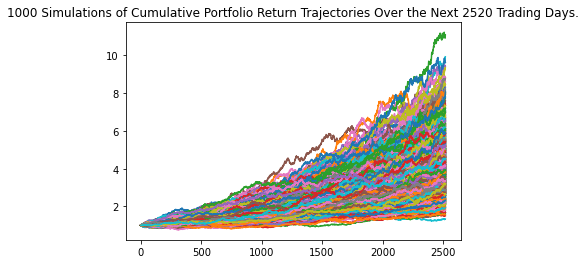

In [10]:
# Plot the 10 year MC simulation for etfs

MC_etf_10_line_plot = MC_etf_10.plot_simulation()


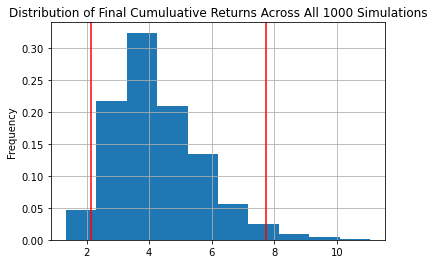

In [27]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

plot = MC_etf_10_bar_plot = MC_etf_10.plot_distribution()
plot.grid()


In [12]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

MC_etf_10_table = MC_etf_10.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics

print(MC_etf_10_table)


count           1000.000000
mean               4.258226
std                1.410768
min                1.331731
25%                3.264474
50%                4.015944
75%                5.065898
max               11.064949
95% CI Lower       2.133906
95% CI Upper       7.746805
Name: 2520, dtype: float64


MC 10 year 95% confidence interval

In [13]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the bond portfolio

ci_lower_10_cumulative_return = round(MC_etf_10_table[8] * 10000,2)
ci_upper_10_cumulative_return = round(MC_etf_10_table[9] * 10000,2)


# Print the result of your calculations

print(f"There is a 95% chance that the bond portfolio will end up within the range of ${ci_lower_10_cumulative_return} and ${ci_upper_10_cumulative_return} in 10 years.")

There is a 95% chance that the bond portfolio will end up within the range of $21339.06 and $77468.05 in 10 years.


MC 30 year simulation

In [14]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split evenly.
# Run 1000 samples.

MC_etf_30 = MCSimulation(
    portfolio_data = etf_prices,
    weights = [.2, .2, .2, .2, .2],
    num_simulation = 1000,
    num_trading_days = 252*30)


# Review the simulation input data

MC_etf_30.portfolio_data.head()

EEM                                   \
                             open   high    low  close      volume   
time                                                                 
2018-01-02 00:00:00-05:00  47.780  48.07  47.73  48.03  54314473.0   
2018-01-03 00:00:00-05:00  48.285  48.52  48.12  48.16  43364800.0   
2018-01-04 00:00:00-05:00  48.260  48.75  48.24  48.72  45483407.0   
2018-01-05 00:00:00-05:00  48.820  49.06  48.71  48.81  39708855.0   
2018-01-08 00:00:00-05:00  48.740  49.22  48.70  49.13  26260470.0   

                                           VOO                            ...  \
                          daily_return    open    high       low   close  ...   
time                                                                      ...   
2018-01-02 00:00:00-05:00          NaN  246.15  247.03  245.7361  247.03  ...   
2018-01-03 00:00:00-05:00     0.002707  247.19  248.70  247.1800  248.56  ...   
2018-01-04 00:00:00-05:00     0.011628  249.27  250.12  249.1700  249.63  ...   
2018-01-05 00:00:00-05:00     0.001847  250.46  251.40  249.9500  251.25  ...   
2018-01-08 00:00:00-05:00     0.006556  251.16  251.88  250.8700  251.72  ...   

                                VTV                                     VUG  \
                                low   close     volume daily_return    open   
time                                                                          
2018-01-02 00:00:00-05:00  106.3300  106.65  1536278.0          NaN  141.29   
2018-01-03 00:00:00-05:00  106.5900  107.04  1143788.0     0.003657  142.40   
2018-01-04 00:00:00-05:00  107.2600  107.69  1364432.0     0.006072  144.07   
2018-01-05 00:00:00-05:00  107.7050  108.19  1229513.0     0.004643  144.37   
2018-01-08 00:00:00-05:00  107.9231  108.33  1294534.0     0.001294  145.12   

                                                                             
                             high       low   close     volume daily_return  
time                                                                         
2018-01-02 00:00:00-05:00  142.27  141.0524  142.25   984355.0          NaN  
2018-01-03 00:00:00-05:00  143.66  142.4000  143.56   653690.0     0.009209  
2018-01-04 00:00:00-05:00  144.30  143.8548  143.95   703928.0     0.002717  
2018-01-05 00:00:00-05:00  145.24  144.2899  145.20  1061025.0     0.008684  
2018-01-08 00:00:00-05:00  145.73  145.0800  145.62   683662.0     0.002893  

[5 rows x 30 columns]

In [15]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_etf_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996662,1.011901,1.005092,0.998882,1.003131,0.997723,1.004913,0.997000,0.997064,1.003853,...,1.003409,1.003004,0.996865,1.008360,1.008651,1.007620,1.011110,1.005095,0.990159,1.005188
2,0.991615,1.014617,1.006358,1.001349,1.011681,0.996223,1.003773,0.993870,0.998081,1.002744,...,1.007402,0.992824,1.005925,1.011296,1.012437,1.005914,1.013109,0.998286,0.993300,1.016584
3,0.993695,1.014853,0.998544,1.000394,1.014538,0.996005,0.998803,1.004716,0.989984,0.995177,...,1.009622,0.993703,1.007098,1.002728,1.002020,0.999873,1.002877,1.009727,0.991482,1.022433
4,0.986908,1.009509,0.999536,1.012033,1.018338,0.993698,0.993710,1.010769,0.983700,0.999062,...,1.017410,0.980098,1.003741,0.999296,0.997078,1.002875,0.998112,1.016932,1.003743,1.018333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,51.773352,45.323412,34.367846,132.097077,52.358688,98.420853,62.320910,66.764154,70.989043,141.555564,...,45.483699,134.577458,58.323308,65.600028,77.327217,57.764819,50.979259,87.083012,94.511322,43.784178
7557,51.881914,45.448030,34.005251,131.788935,51.746940,97.364593,61.983119,67.415938,70.795732,142.788583,...,46.049661,137.045826,57.866156,65.039143,78.217920,58.232369,51.435254,86.588456,93.950733,43.809146
7558,51.206031,45.011138,33.772890,129.923896,52.145047,98.693219,62.594819,68.100278,70.948921,143.503564,...,45.679938,135.993876,57.799446,64.385565,77.795574,58.064796,51.669352,86.151479,94.045619,43.802368
7559,51.316430,45.163348,33.702211,130.866471,52.150517,98.140168,62.618180,68.094133,71.525221,145.223801,...,45.681007,135.211620,57.607516,65.033332,78.304223,57.700487,51.502136,86.572955,93.760621,43.943698


MC 30 year visualizations & stats

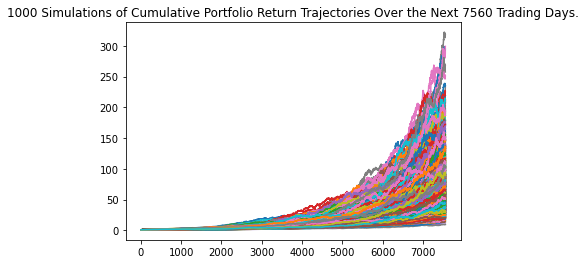

In [16]:
# Plot the 30 year MC simulation for etfs

MC_etf_30_line_plot = MC_etf_30.plot_simulation()


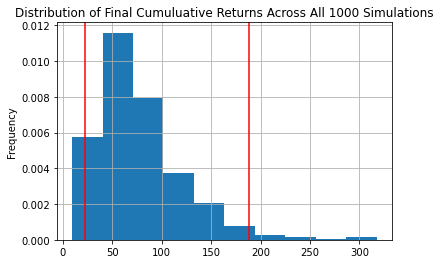

In [28]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

plot = MC_etf_30_bar_plot = MC_etf_30.plot_distribution()
plot.grid()


In [18]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_etf_30_table = MC_etf_30.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics

print(MC_etf_30_table)


count           1000.000000
mean              76.679321
std               42.969480
min                9.449744
25%               46.739330
50%               66.892327
75%               96.224798
max              317.398589
95% CI Lower      22.683851
95% CI Upper     188.251788
Name: 7560, dtype: float64


MC 30 year 95% confidence interval

In [19]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the etf portfolio

ci_lower_30_cumulative_return = round(MC_etf_30_table[8] * 10000,2)
ci_upper_30_cumulative_return = round(MC_etf_30_table[9] * 10000,2)


# Print the result of your calculations

print(f"There is a 95% chance that the etf portfolio will end up within the range of ${ci_lower_30_cumulative_return} and ${ci_upper_30_cumulative_return} in 30 years.")


There is a 95% chance that the etf portfolio will end up within the range of $226838.51 and $1882517.88 in 30 years.


Closing price dataframe

In [20]:
# Create an empty DataFrame to populate the closing prices on the etfs

etf_closing_prices = pd.DataFrame()


# Use for-loop to pull the tickers' closing prices and populate the etf_closing_prices DataFrame

for ticker in tickers:
    etf_closing_prices[ticker] = etf_prices[ticker]["close"] 


# Review DataFrame

etf_closing_prices

,EEM,VOO,VTI,VTV,VUG
time,,,,,
2018-01-02 00:00:00-05:00,48.030,247.0300,138.22,106.650,142.25
2018-01-03 00:00:00-05:00,48.160,248.5600,139.02,107.040,143.56
2018-01-04 00:00:00-05:00,48.720,249.6300,139.54,107.690,143.95
2018-01-05 00:00:00-05:00,48.810,251.2500,140.40,108.190,145.20
2018-01-08 00:00:00-05:00,49.130,251.7200,140.67,108.330,145.62
...,...,...,...,...,...
2021-11-01 00:00:00-04:00,51.330,423.0100,238.10,143.310,314.37
2021-11-02 00:00:00-04:00,50.860,424.6500,238.81,143.922,315.25
2021-11-03 00:00:00-04:00,51.120,427.2682,240.52,144.690,317.47


Calculate aggregate daily & annual returns

In [21]:
# Calculate the etfs portfolio aggregate daily returns

etf_portfolio_returns = etf_closing_prices.sum(axis=1).pct_change().dropna()


# Review the first 5 rows of the aggregate daily returns

etf_portfolio_returns.head()

time
2018-01-03 00:00:00-05:00    0.006098
2018-01-04 00:00:00-05:00    0.004648
2018-01-05 00:00:00-05:00    0.006265
2018-01-08 00:00:00-05:00    0.002335
2018-01-09 00:00:00-05:00    0.001294
dtype: float64

In [22]:
# Calculate the annual average return data for the for etf portfolios
# Use 252 as the number of trading days in the year

etf_portfolio_avg_returns = etf_portfolio_returns.mean() * 252


# Review the annual average returns for the etf portfolio

etf_portfolio_avg_returns

0.25610520660350894

Calculate standard deviation & annual standard deviation

In [23]:
# Calculate the etfs portfolio standard deviation

etf_portfolio_std = etf_portfolio_returns.std()


# Review the standard devations

etf_portfolio_std

0.030579435836609423

In [24]:
# Calculate the annualized standard deviation (252 trading days) of the etf portfolio

etf_portfolio_std_annualized = (etf_portfolio_std * np.sqrt(252))


# Review the annualized std for the etf portfolio

etf_portfolio_std_annualized

0.48543349473794944

Calculate Sharpe Ratio

In [25]:
# Calculate the annualized Sharpe Ratios for the etf portfolio

etf_portfolio_sharpe_ratio = etf_portfolio_avg_returns / etf_portfolio_std_annualized


# Review the Sharpe Ratio for the etfs

etf_portfolio_sharpe_ratio

0.5275804191092369

Calculate & plot cumulative returns

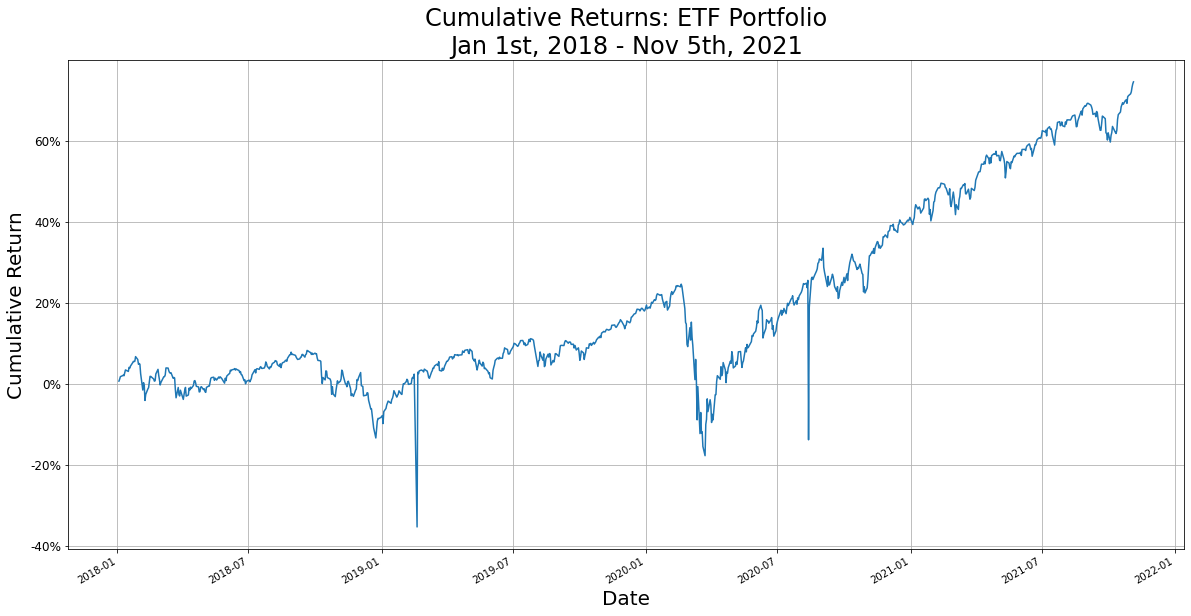

In [31]:
# Calculate the etf portoflio cumulative returns

etf_cum_return = (1 + etf_portfolio_returns).cumprod() -1

plot = etf_cum_return.plot(
    title='Cumulative Returns: ETF Portfolio\n'
                'Jan 1st, 2018 - Nov 5th, 2021',
                figsize=(20,10))

# format title
title =  plot.get_title()
plot.set_title(title, fontdict={'fontsize':24})

# format axes
plot.set_xlabel('Date', fontdict={'fontsize':20})
plot.set_ylabel('Cumulative Return', fontdict={'fontsize':20})
yticks_loc = plot.get_yticks().tolist()
plot.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
plot.set_yticklabels(['{:,.0%}'.format(x) for x in yticks_loc],fontdict={'fontsize':12})

plot.grid()

Write cum returns df to csv

In [32]:
# Write the etf cumulative returns dataframe to a csv for consolidation

etf_cum_return.to_csv('../data/cum_returns_etf.csv')